## Import data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [ ]:
import pandas as pd

# An overview to our dataset
cardio_df = pd.read_csv("cardio_train.csv", sep=";")
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


##Cleaning


In [ ]:
#numpy, matplotlib and seaborn
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Preprocess Data

In [ ]:
# Checking the number of variables and observations in the dataframe
print("There are {} variables and {} observations in the dataframe\n".format(cardio_df.shape[1], cardio_df.shape[0]))

There are 13 variables and 70000 observations in the dataframe



In [ ]:
#Drop ID
cardio_df = cardio_df.drop(["id"], axis=1)

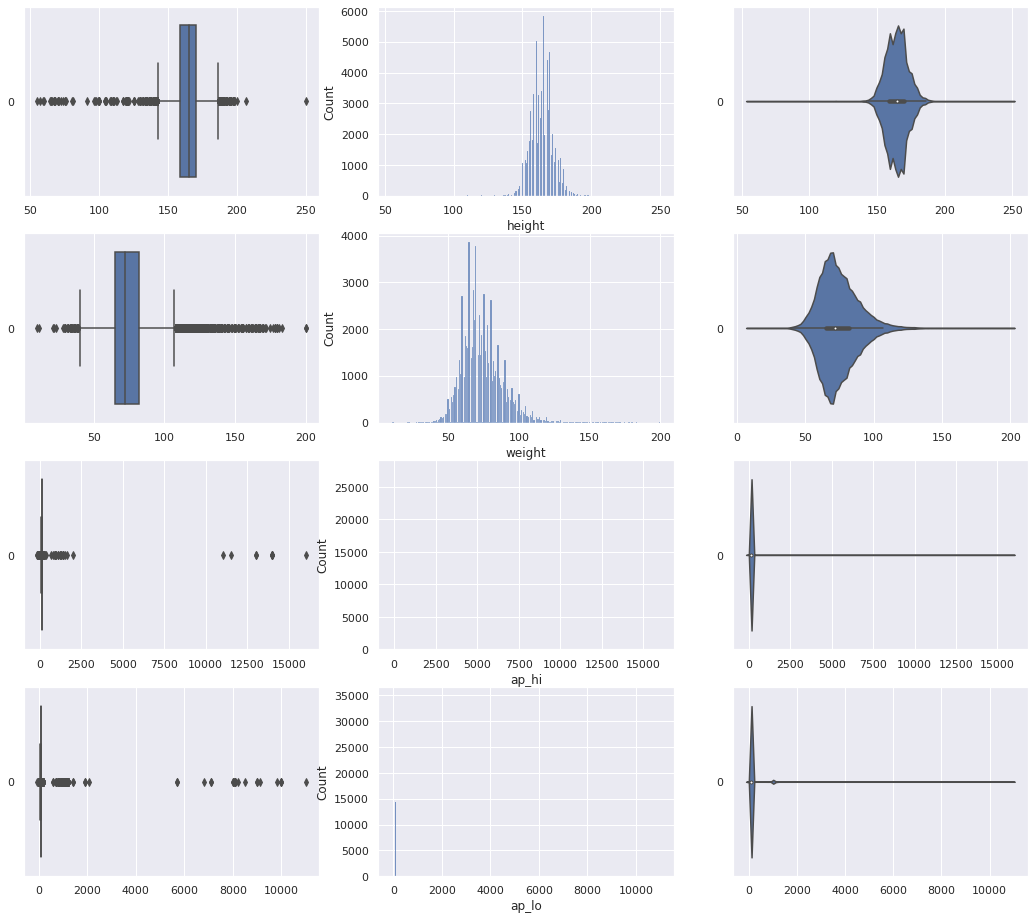

In [ ]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(4, 3, figsize=(18, 16))

count = 0
for var in ['height', 'weight','ap_hi','ap_lo']:
    sb.boxplot(data = cardio_df[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = cardio_df[var], ax = axes[count,1])
    sb.violinplot(data = cardio_df[var], orient = "h", ax = axes[count,2])
    count += 1

In [ ]:
# Can be noted that the ap_hi and ap_lo values have some abnormally high data points

In [ ]:
#Change age from Date to Yrs Old
cardio_df["age"] = (cardio_df["age"]/365.0).round().astype(np.int64)
#Add BMI
cardio_df["BMI"] = (cardio_df["weight"]/pow(cardio_df["height"],2))*10000

### Remove Impossible data

In [ ]:
#Remove Impossible Values
cardio_df = cardio_df[(cardio_df["ap_hi"] < 300) & (cardio_df["ap_hi"] > 0) &
                      (cardio_df["ap_lo"] < 200) & (cardio_df["ap_lo"] > 0) &
                      (cardio_df["ap_lo"] < cardio_df["ap_hi"]) &
                      (cardio_df["BMI"] < 60) & (cardio_df["BMI"] > 15)]
                      
cardio_df = cardio_df.reset_index(drop=True)
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


###Remove Duplicate

In [ ]:
# Number of missing values and duplicated values in the dataframe
print("There are {} missing values".format(cardio_df.isna().sum().sum()))
print("There are {} duplicated values".format(cardio_df.duplicated().sum()))

There are 0 missing values
There are 3815 duplicated values


In [ ]:
#Remove Duplicates
cardio_df.drop_duplicates(inplace=True)
cardio_df = cardio_df.reset_index(drop=True)
print("There are {} duplicated values".format(cardio_df.duplicated().sum()))

There are 0 duplicated values


In [ ]:
#Change categorical columns to the right data type
cat_data = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
for name in cat_data:
  cardio_df[name] = cardio_df[name].astype('category')
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [ ]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64805 entries, 0 to 64804
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          64805 non-null  int64   
 1   gender       64805 non-null  category
 2   height       64805 non-null  int64   
 3   weight       64805 non-null  float64 
 4   ap_hi        64805 non-null  int64   
 5   ap_lo        64805 non-null  int64   
 6   cholesterol  64805 non-null  category
 7   gluc         64805 non-null  category
 8   smoke        64805 non-null  category
 9   alco         64805 non-null  category
 10  active       64805 non-null  category
 11  cardio       64805 non-null  category
 12  BMI          64805 non-null  float64 
dtypes: category(7), float64(2), int64(4)
memory usage: 3.4 MB


In [ ]:
cardio_df.describe()

,age,height,weight,ap_hi,ap_lo,BMI
count,64805.000000,64805.000000,64805.000000,64805.000000,64805.000000,64805.000000
mean,53.352318,164.396327,74.469546,127.039287,81.366515,27.595306
std,6.810257,8.063562,14.419802,17.050306,9.790772,5.284905
min,30.000000,109.000000,28.000000,16.000000,1.000000,15.012197
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.875115
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.566840
75%,59.000000,170.000000,82.000000,140.000000,90.000000,30.449954
max,65.000000,207.000000,200.000000,240.000000,182.000000,59.523810


###Remove Outliers from the Dataset

In [ ]:
# to remove values more than 1.5 times the Inter Quartile Range (IQR) variable values
def outliers_iqr(data, name):
    quartile1, quartile3 = np.percentile(data, [25,75])
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - (iqr*3)
    upper_bound = quartile3 + (iqr*3)
    
    #print(f'Q1:{quartile1}, Q3:{quartile3}, IQR:{iqr}')
    print('The accepted range of', name, 'is\t:', f'Lower Bound:{lower_bound:.4f}\t Upper Bound:{upper_bound:.4f}')
    
    return lower_bound, upper_bound

In [ ]:
height_outlier = outliers_iqr(cardio_df['height'],'height')
weight_outlier = outliers_iqr(cardio_df['weight'],'weight')
aphi_outlier = outliers_iqr(cardio_df['ap_hi'], 'ap_hi')
aplo_outlier = outliers_iqr(cardio_df['ap_lo'], 'ap_lo')
bmi_outlier = outliers_iqr(cardio_df['BMI'], 'BMI')

The accepted range of height is	: Lower Bound:126.0000	 Upper Bound:203.0000
The accepted range of weight is	: Lower Bound:14.0000	 Upper Bound:133.0000
The accepted range of ap_hi is	: Lower Bound:60.0000	 Upper Bound:200.0000
The accepted range of ap_lo is	: Lower Bound:50.0000	 Upper Bound:120.0000
The accepted range of BMI is	: Lower Bound:4.1506	 Upper Bound:50.1745


In [ ]:
cardio_df = cardio_df[(cardio_df["height"] > height_outlier[0]) & (cardio_df["height"] < height_outlier[1]) &
                      (cardio_df["weight"] > weight_outlier[0]) & (cardio_df["weight"] < weight_outlier[1]) &
                      (cardio_df["ap_hi"] > aphi_outlier[0]) & (cardio_df["ap_hi"] < aphi_outlier[1]) &
                      (cardio_df["ap_lo"] > aplo_outlier[0]) & (cardio_df["ap_lo"] < aplo_outlier[1]) &
                      (cardio_df["BMI"] > bmi_outlier[0]) & (cardio_df["BMI"] < bmi_outlier[1])]

cardio_df = cardio_df.reset_index(drop=True)
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


##Visualization and Observation

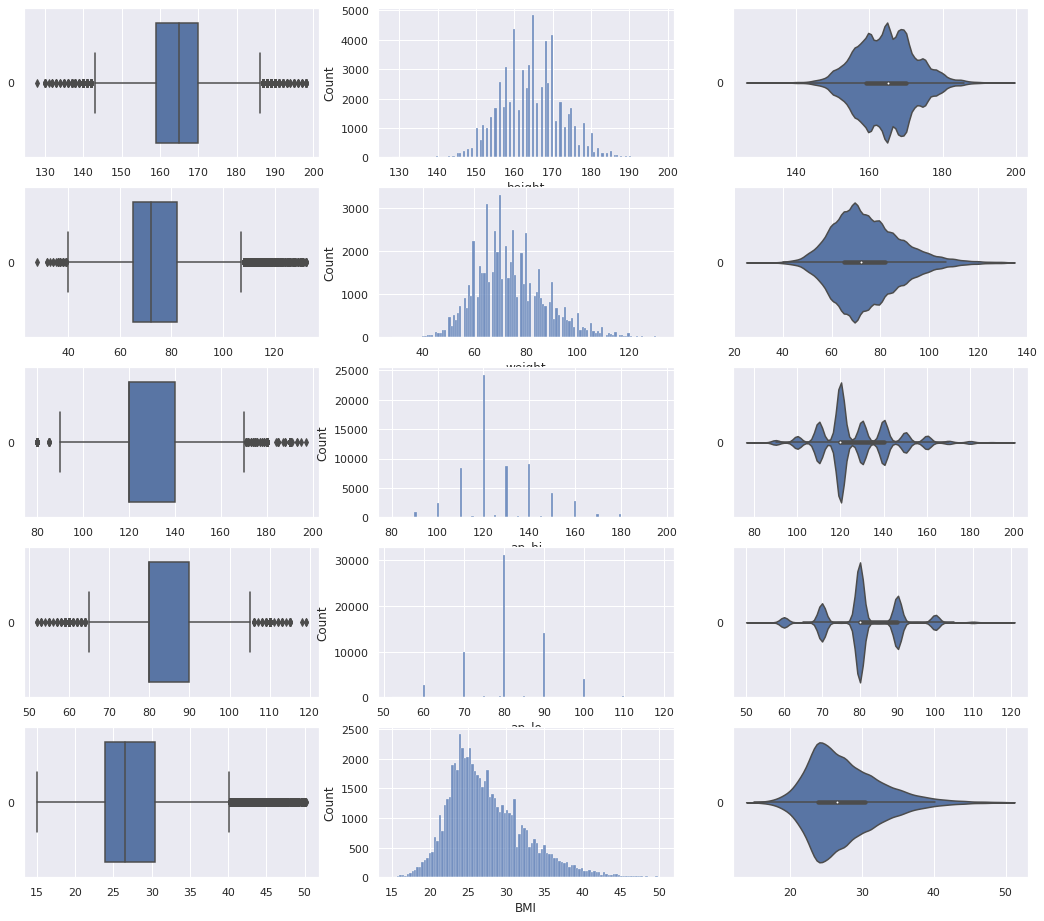

In [ ]:
# Distirbution of Numerical Data after cleaning
f, axes = plt.subplots(5, 3, figsize=(18, 16))

df2 = cardio_df.copy()
count = 0
for var in ['height', 'weight','ap_hi','ap_lo', 'BMI']:
    sb.boxplot(data = df2[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = df2[var], ax = axes[count,1])
    sb.violinplot(data = df2[var], orient = "h", ax = axes[count,2])
    count += 1

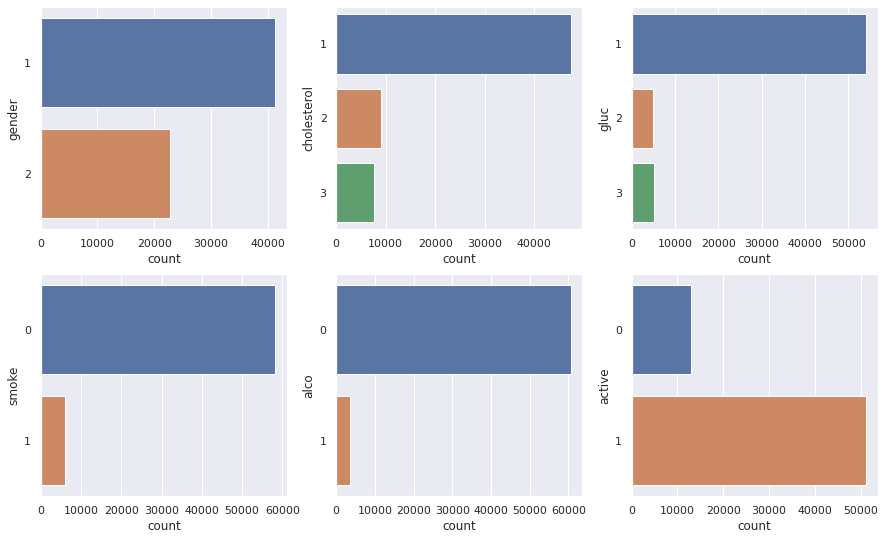

In [ ]:
# Distribution of Categorical Data after cleaning
fig, ax = plt.subplots(2, 3, figsize=(15,9))

r, c = 0, 0
for name in cat_data[:-1]:
    sb.countplot(y=name, data=df2, ax = ax[r, c])
    c += 1
    if c == 3:
        r += 1
        c = 0

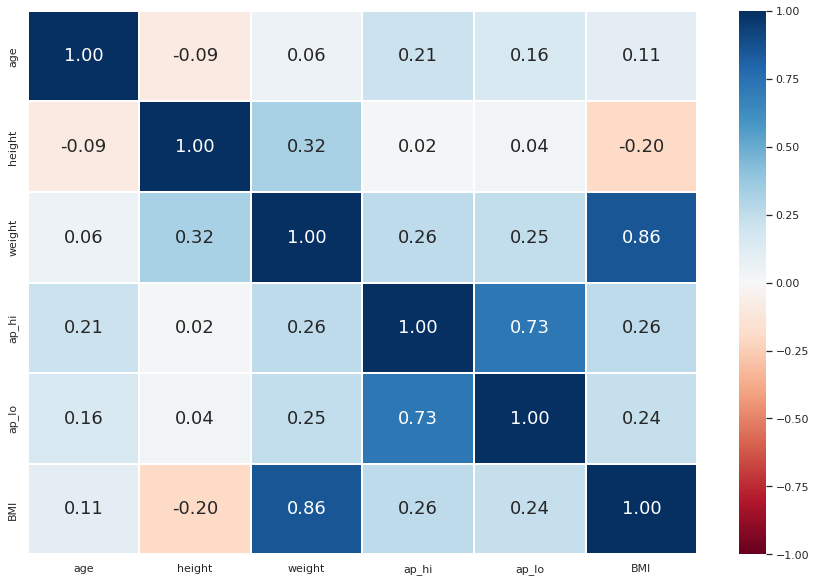

In [ ]:
# The correlation among numerical variables
f = plt.figure(figsize=(15, 10))

sb.heatmap(df2.select_dtypes(include=["int64", "float64"]).corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

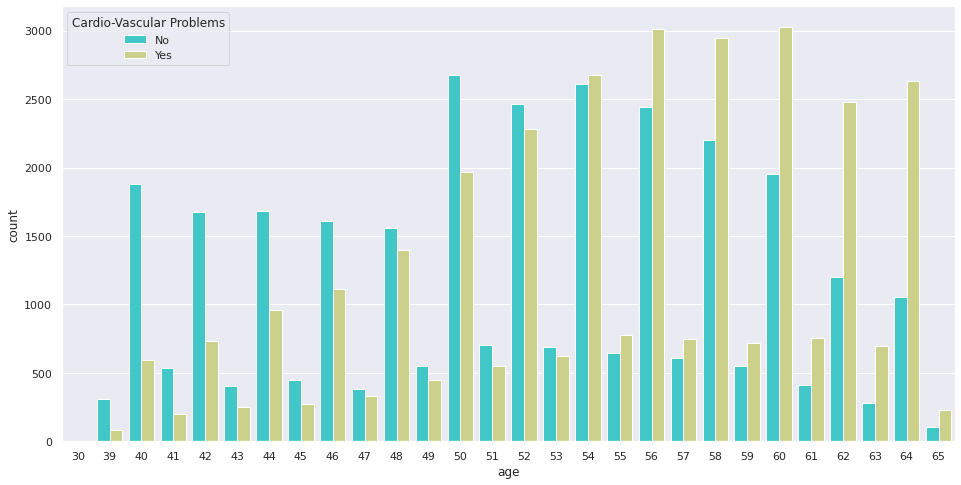

In [ ]:
# The relationship between AGE and CARDIO
plt.figure(figsize=(16, 8))
sb.countplot(data = df2, x = "age", hue = "cardio", palette='rainbow')
plt.legend(title='Cardio-Vascular Problems', loc='upper left', labels=['No', 'Yes'])

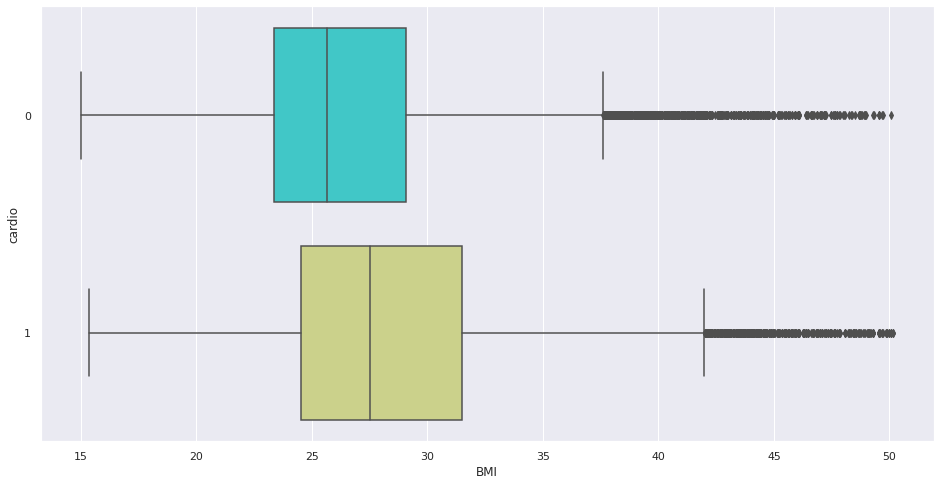

In [ ]:
# The relationship between BMI and CARDIO
plt.figure(figsize=(16, 8))
sb.boxplot(data = df2, y = "cardio", x="BMI", palette="rainbow")

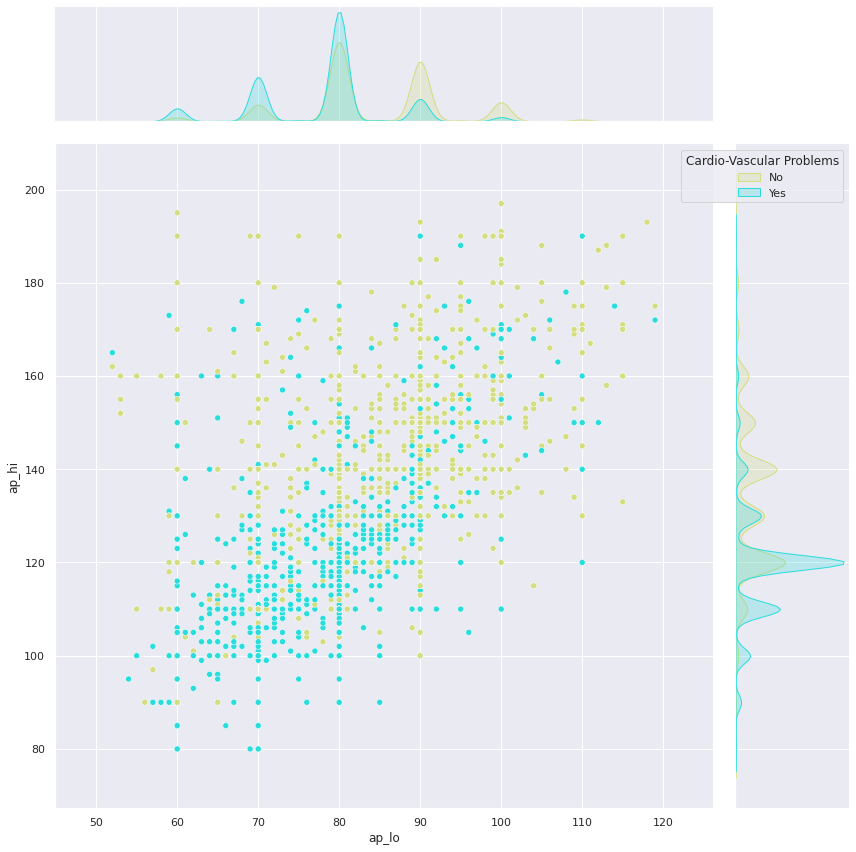

In [ ]:
# The pairplot relationship between ap_lo and ap_hi with cardio as hue
sb.jointplot(data = df2, x = 'ap_lo', y = 'ap_hi', hue = 'cardio', height = 12, legend = False,palette='rainbow')
plt.legend(title='Cardio-Vascular Problems', loc='best', labels=['No', 'Yes'])



```
# This is formatted as code
```

#Other Interesting Observations

In [ ]:
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=180 or y<=120:
        return "high 2"
    elif x>180 or y>120:
        return 'high 3'
    else:
        return None
    
df2.insert(8, "bp_cat", df2.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))
df2['bp_cat'].value_counts()

normal      35151
high 1      14911
high 2      13669
elevated      412
Name: bp_cat, dtype: int64

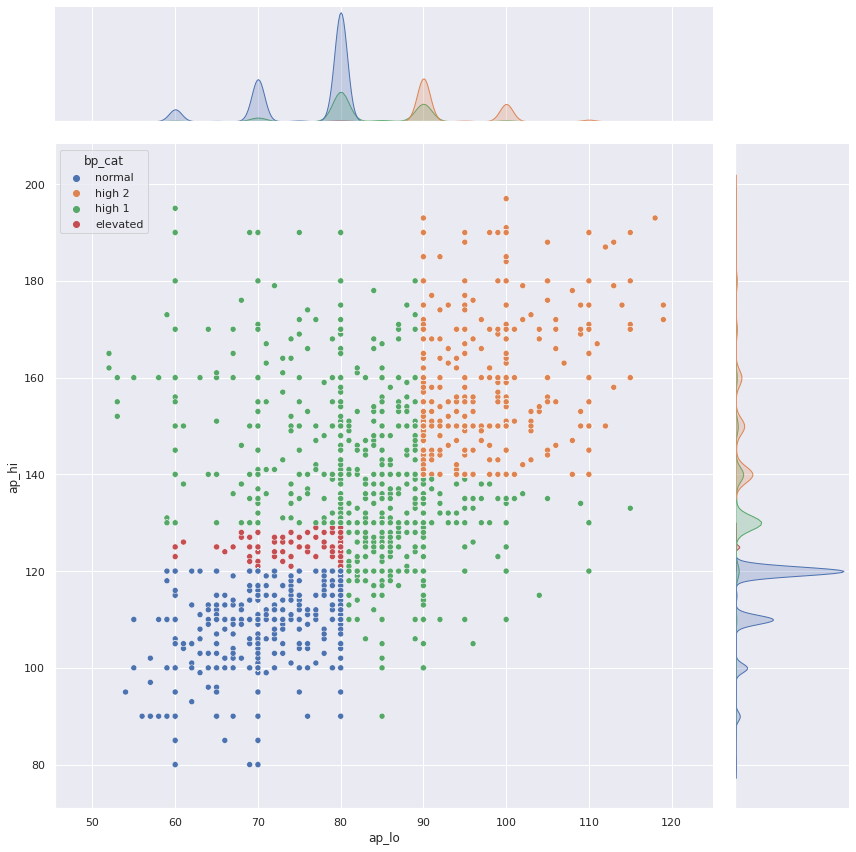

In [ ]:
sb.jointplot(data = df2, x = 'ap_lo', y = 'ap_hi', hue = 'bp_cat', height = 12, legend = True)

# Decision Tree Classifier

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def FNR(real, pred):
  CM = confusion_matrix(real, pred)
  TN = CM[0][0]
  FN = CM[1][0]
  return TN/(TN+FN)
  
# Extract Response and Predictors
predictors_dectree = ["ap_hi","cholesterol","age","weight", "gluc"]

y = pd.DataFrame(cardio_df["cardio"])
X = pd.DataFrame(cardio_df[predictors_dectree]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Decision Tree Classifier with "ap_hi", "cholesterol", "age", "weight", "gluc"

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7225
False Negative Rate     	: 0.7155

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7318
False Negative Rate     	: 0.7304



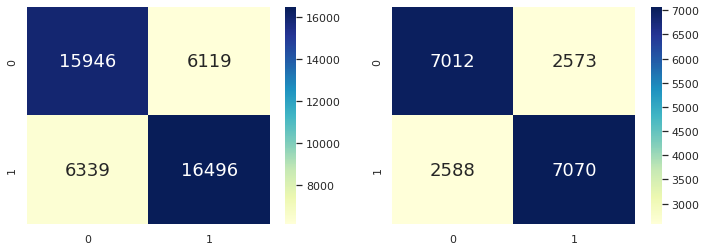

In [ ]:
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

fnr_test = FNR(y_test, y_test_pred)
fnr_train = FNR(y_train, y_train_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print(f"Classification Accuracy \t: {dectree.score(X_train, y_train):.4f}")
print(f"False Negative Rate     \t: {fnr_train:.4f}\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print(f"Classification Accuracy \t: {dectree.score(X_test, y_test):.4f}")
print(f"False Negative Rate     \t: {fnr_test:.4f}\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, cmap="YlGnBu", ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, cmap="YlGnBu", ax = axes[1])

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors_dectree = ["ap_hi","cholesterol","age","weight", "gluc"]
# list of results
all_accuracy_test = []
all_accuracy_train = []
fnr_test = []
fnr_train = []
for i in range(100):
  y = pd.DataFrame(cardio_df["cardio"])
  X = pd.DataFrame(cardio_df[predictors_dectree]) 

  # Split the Dataset into Train and Test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

  # Decision Tree using Train Data
  dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
  dectree.fit(X_train, y_train)                    # train the decision tree model

  # Predict Response corresponding to Predictors
  y_train_pred = dectree.predict(X_train)
  y_test_pred = dectree.predict(X_test)

  all_accuracy_train.append(dectree.score(X_train, y_train))
  all_accuracy_test.append(dectree.score(X_test, y_test))
  fnr_test.append(FNR(y_test, y_test_pred))
  fnr_train.append(FNR(y_train, y_train_pred))

       all_accuracy_test  all_accuracy_train    fnr_test   fnr_train
count         100.000000          100.000000  100.000000  100.000000
mean            0.724008            0.725912    0.717480    0.719441
std             0.002755            0.001298    0.006637    0.005128
min             0.717040            0.722650    0.685568    0.695533
25%             0.722263            0.725228    0.714425    0.717295
50%             0.723848            0.725891    0.718233    0.720384
75%             0.725420            0.726882    0.721248    0.722790
max             0.732370            0.729131    0.731143    0.726401


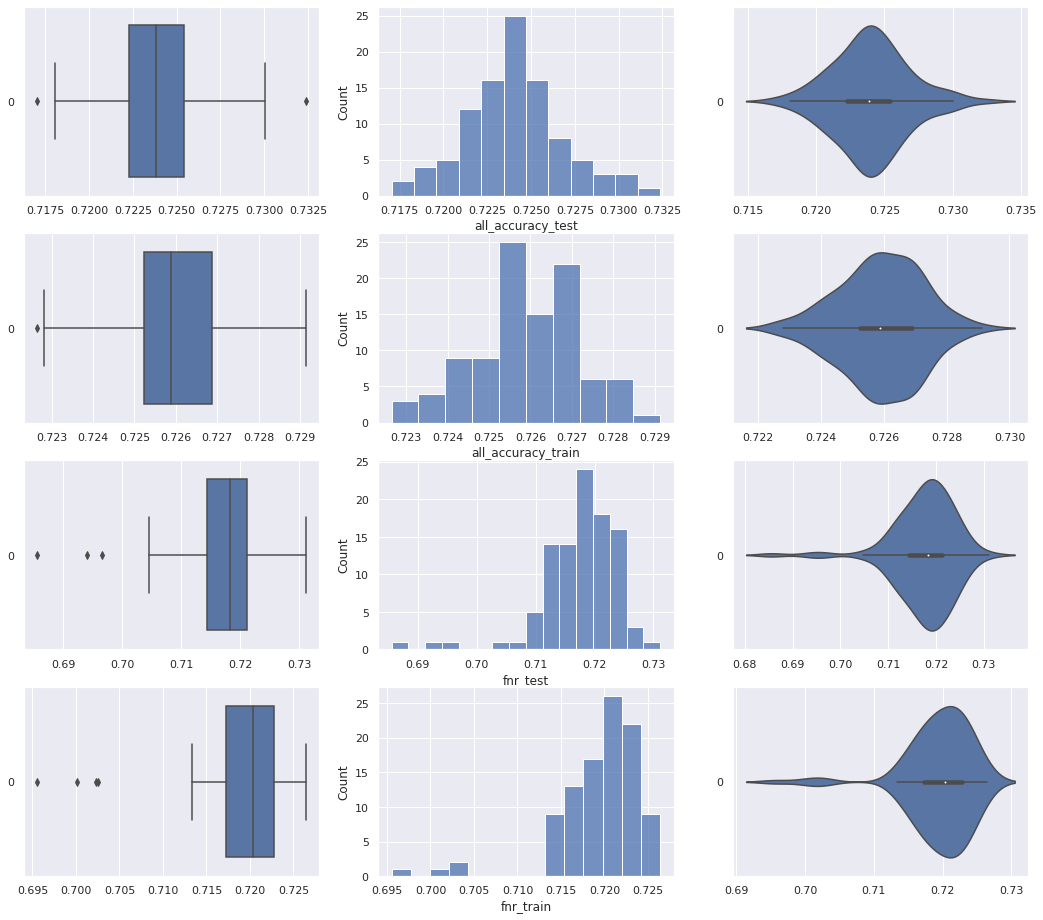

In [ ]:
All = pd.DataFrame([all_accuracy_test, all_accuracy_train, fnr_test, fnr_train]).transpose()
All.columns = ['all_accuracy_test', 'all_accuracy_train', 'fnr_test', 'fnr_train']
print(All.describe())
# Draw the distributions of all Predictors
f, axes = plt.subplots(4, 3, figsize=(18, 16))

count = 0
for var in ['all_accuracy_test', 'all_accuracy_train', 'fnr_test', 'fnr_train']:
    sb.boxplot(data = All[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = All[var], ax = axes[count,1])
    sb.violinplot(data = All[var], orient = "h", ax = axes[count,2])
    count += 1

## Decision Tree Classifier with only "ap_hi" and "cholesterol"

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors_dectree = ["ap_hi","cholesterol"]
# list of results
imp_accuracy_test = []
imp_accuracy_train = []
fnr_test = []
fnr_train = []
for i in range(100):
  y = pd.DataFrame(cardio_df["cardio"])
  X = pd.DataFrame(cardio_df[predictors_dectree]) 

  # Split the Dataset into Train and Test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

  # Decision Tree using Train Data
  dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
  dectree.fit(X_train, y_train)                    # train the decision tree model

  # Predict Response corresponding to Predictors
  y_train_pred = dectree.predict(X_train)
  y_test_pred = dectree.predict(X_test)

  imp_accuracy_train.append(dectree.score(X_train, y_train))
  imp_accuracy_test.append(dectree.score(X_test, y_test))
  fnr_test.append(FNR(y_test, y_test_pred))
  fnr_train.append(FNR(y_train, y_train_pred))

       imp_accuracy_test  imp_accuracy_train    fnr_test   fnr_train
count         100.000000          100.000000  100.000000  100.000000
mean            0.719964            0.720637    0.697017    0.697996
std             0.002757            0.001183    0.003797    0.001662
min             0.710700            0.718285    0.687238    0.693458
25%             0.717910            0.719722    0.695144    0.697113
50%             0.720210            0.720612    0.696719    0.697968
75%             0.722003            0.721437    0.699087    0.698979
max             0.725459            0.724655    0.706911    0.701891


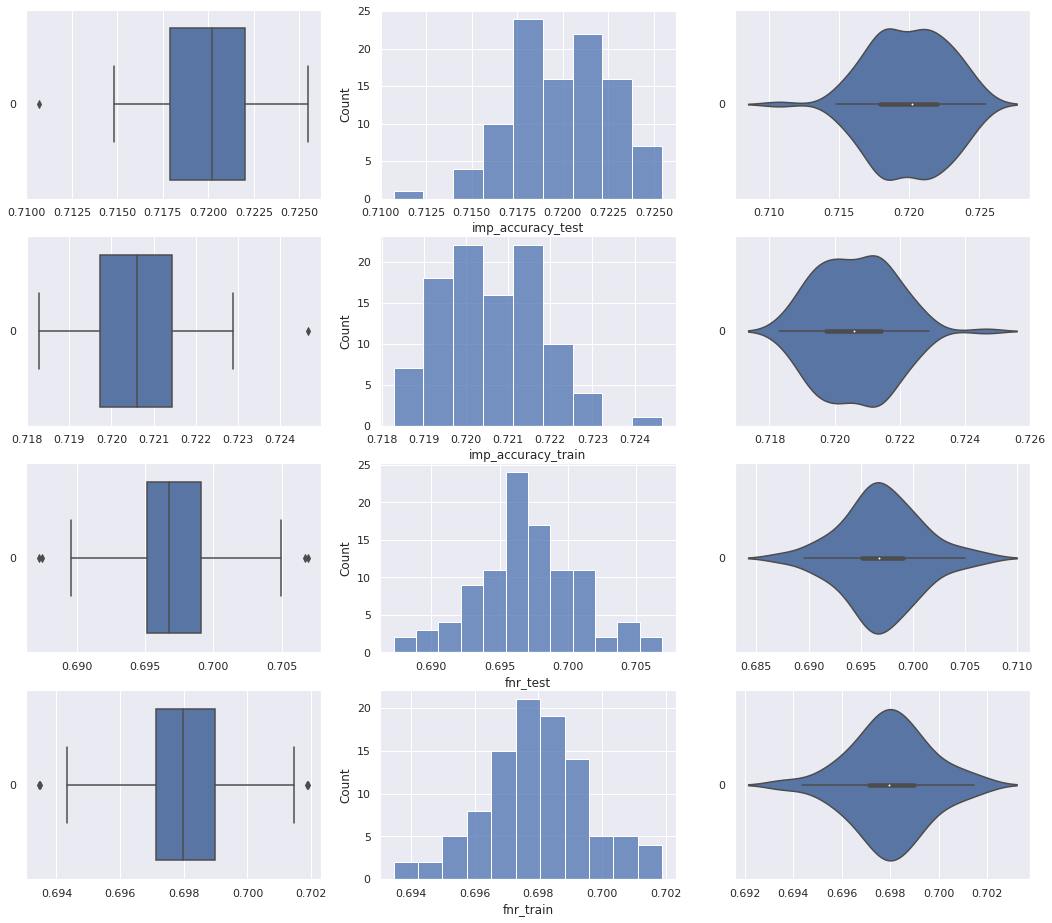

In [ ]:
Imp = pd.DataFrame([imp_accuracy_test, imp_accuracy_train, fnr_test, fnr_train]).transpose()
Imp.columns = ['imp_accuracy_test', 'imp_accuracy_train', 'fnr_test', 'fnr_train']
print(Imp.describe())
# Draw the distributions of all Predictors
f, axes = plt.subplots(4, 3, figsize=(18, 16))

count = 0
for var in ['imp_accuracy_test', 'imp_accuracy_train', 'fnr_test', 'fnr_train']:
    sb.boxplot(data = Imp[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = Imp[var], ax = axes[count,1])
    sb.violinplot(data = Imp[var], orient = "h", ax = axes[count,2])
    count += 1

In [ ]:
# Can be observed that ap_hi and cholesterol can greatily represent the other variables and is important in predicting cardio using Decision Tree Model.
# The Model with ap_hi and cholesterol only can predict with, in average, lower false negative rate and more normal response which is a better scenario

#XGBoost

In [ ]:
# XGBoost Model Prediction (Done by Liu Songting)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

cardio_df[['cholesterol','gluc','gender', 'smoke', 'alco', 'active']] = cardio_df[['cholesterol','gluc','gender', 'smoke', 'alco', 'active']].astype(np.int64)
y = cardio_df.cardio
X = cardio_df.drop(columns=['cardio','BMI'],axis = 1)

In [ ]:
model = xgb.XGBClassifier(max_depth=4,
              learning_rate=0.01,
              n_estimators=500,
              min_child_weight=3,
              max_delta_step=0,
              subsample=0.7,
              colsample_bytree=0.7,
              reg_alpha=0,
              reg_lambda=2.,
              scale_pos_weight=1,
              silent=True,
              objective='binary:logistic',
              missing=None,
              eval_metric='auc',
              seed=1440,
              gamma=0.1)

kfold = StratifiedKFold(n_splits=5,random_state=2021,shuffle=True)
results = cross_val_score(model,X,y,cv=kfold)

In [ ]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 73.16% (0.36%)


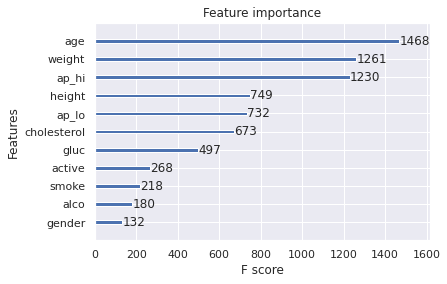

In [ ]:
# If use height & weight
model.fit(X,y)

# show importance of each feature
plot_importance(model)
plt.show()

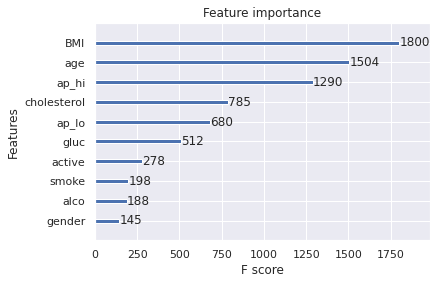

In [ ]:
# If use BMI instead of height & weight
y = cardio_df.cardio
X = cardio_df.drop(columns=['cardio','height','weight'],axis = 1)
model.fit(X,y)

# show importance of each feature
plot_importance(model)
plt.show()

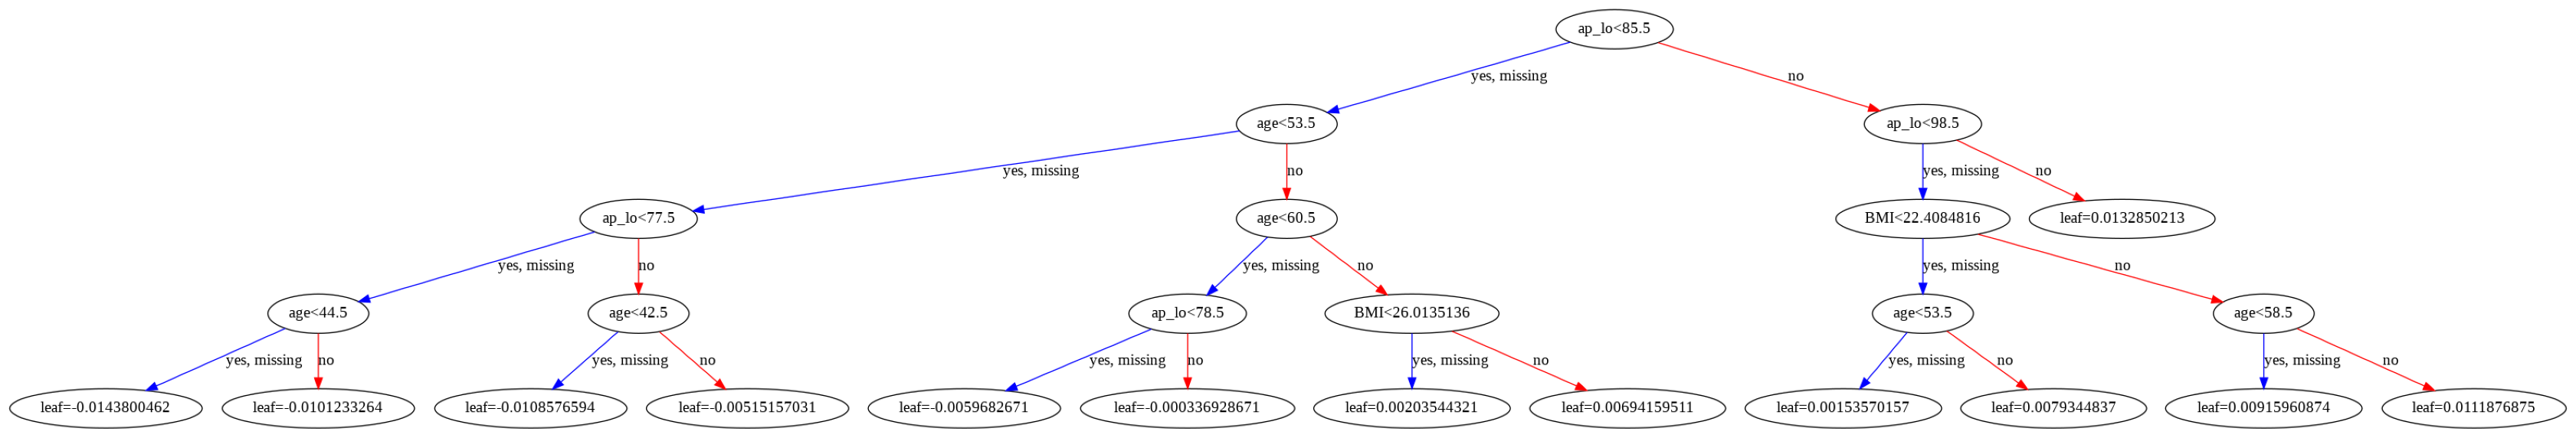

In [ ]:
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()
ceate_feature_map(X.columns)

fig,ax = plt.subplots()
fig.set_size_inches(60,60)
xgb.plot_tree(model,ax = ax,fmap='xgb.fmap', num_trees = 3)

In the experiments above, we found that the features which have the most predictive power are Age, ap_hi and BMI.

In [ ]:
# Find out whether blood pressure has predictive power using simple linear classifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

y = cardio_df.cardio
X = cardio_df.drop("cardio",axis = 1)
x_train, x_predict, y_train, y_predict = train_test_split(X[['ap_hi','BMI','age']], y, test_size=0.10, random_state=2021)
print("Length of train dataset:",len(x_train))
print("Length of predict dataset:",len(x_predict))

Length of train dataset: 57728
Length of predict dataset: 6415


In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)
y_predict = np.array([])
lr_y_predict = np.array([])
df2 = np.array(cardio_df)
avg_accuracy = 0
for train, test in kfold.split(X = cardio_df.drop(columns=['cardio']), y = cardio_df["cardio"]):
  x_train = df2[train,...][...,[0,4,5,12]]
  y_train = df2[train,...][...,[11]]
  x_test = df2[test,...][...,[0,4,5,12]]
  y_test = df2[test,...][...,[11]]
  x_train = x_train.astype(np.float)
  x_test = x_test.astype(np.float)
  y_train = y_train.astype(np.bool)
  y_test = y_test.astype(np.bool)
  lr=LogisticRegression()
  lr.fit(x_train,y_train)
  lr_y_test=lr.predict(x_test)
  y_predict = np.append(y_predict,y_test)
  lr_y_predict = np.append(lr_y_predict,lr_y_test)
  print('Accuracy of LR Classifier:',lr.score(x_test,y_test),'\n')
  avg_accuracy += lr.score(x_test,y_test)/5
print(classification_report(y_predict,lr_y_predict,target_names=['non-cardio','cardio']),'\n')
print("Average accuracy of Linear Classifier:",avg_accuracy)

Accuracy of LR Classifier: 0.7189180762335334 

Accuracy of LR Classifier: 0.714007327149427 

Accuracy of LR Classifier: 0.7180606438537688 

Accuracy of LR Classifier: 0.7120361708762083 

Accuracy of LR Classifier: 0.7188961646398503 

              precision    recall  f1-score   support

  non-cardio       0.70      0.75      0.72     31650
      cardio       0.74      0.68      0.71     32493

    accuracy                           0.72     64143
   macro avg       0.72      0.72      0.72     64143
weighted avg       0.72      0.72      0.72     64143
 

Average accuracy of Linear Classifier: 0.7163836765505576


In [ ]:
# Try the rest categorical features to see whether they have predictive power or not
from sklearn.naive_bayes import GaussianNB
NBclf = GaussianNB()

y = cardio_df.cardio
X = cardio_df.drop("cardio",axis = 1)
x_train, x_predict, y_train, y_predict = train_test_split(X[['gender','cholesterol','gluc','alco','smoke','active']], y, test_size=0.10, random_state=2021)
NBclf.fit(x_train, y_train)
NB_y_predict=NBclf.predict(x_predict)
print('Accuracy of NB Classifier:',NBclf.score(x_predict,y_predict),'\n')
print(classification_report(y_predict,NB_y_predict,target_names=['non-cardio','cardio']),'\n')

Accuracy of NB Classifier: 0.577240841777085 

              precision    recall  f1-score   support

  non-cardio       0.55      0.82      0.65      3146
      cardio       0.66      0.35      0.46      3269

    accuracy                           0.58      6415
   macro avg       0.60      0.58      0.56      6415
weighted avg       0.61      0.58      0.55      6415
 



In [ ]:
from sklearn.naive_bayes import GaussianNB
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)
y_predict = np.array([])
NB_y_predict = np.array([])
df2 = np.array(cardio_df)
avg_accuracy = 0
for train, test in kfold.split(X = cardio_df.drop(columns=['cardio']), y = cardio_df["cardio"]):
  x_train = df2[train,...][...,[1,6,7,8,9,10]]
  y_train = df2[train,...][...,[11]]
  x_test = df2[test,...][...,[1,6,7,8,9,10]]
  y_test = df2[test,...][...,[11]]
  x_train = x_train.astype(np.int)
  x_test = x_test.astype(np.int)
  y_train = y_train.astype(np.bool)
  y_test = y_test.astype(np.bool)
  NBclf = GaussianNB()
  NBclf.fit(x_train, y_train)
  NB_y_test=NBclf.predict(x_test)
  y_predict = np.append(y_predict,y_test)
  NB_y_predict = np.append(NB_y_predict,NB_y_test)
  print('Accuracy of LR Classifier:',NBclf.score(x_test,y_test),'\n')
  avg_accuracy += NBclf.score(x_test,y_test)/5
print(classification_report(y_predict,NB_y_predict,target_names=['non-cardio','cardio']),'\n')
print("Average accuracy of NB Classifier:",avg_accuracy)

Accuracy of LR Classifier: 0.5809494114895939 

Accuracy of LR Classifier: 0.580793514693273 

Accuracy of LR Classifier: 0.5782991659521397 

Accuracy of LR Classifier: 0.5795915185531649 

Accuracy of LR Classifier: 0.5747583411287808 

              precision    recall  f1-score   support

  non-cardio       0.55      0.81      0.66     31650
      cardio       0.66      0.35      0.46     32493

    accuracy                           0.58     64143
   macro avg       0.60      0.58      0.56     64143
weighted avg       0.60      0.58      0.56     64143
 

Average accuracy of NB Classifier: 0.5788783903633905


#Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import warnings

from tqdm import tqdm_notebook as tqdm

In [ ]:
# Setting seed
def seed_everything(seed=2021):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

warnings.filterwarnings("ignore")
sns.set()
seed_everything()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Make the all the categorical data start from 0
cardio_df["gender"] -=  1
cardio_df["cholesterol"] -= 1
cardio_df["gluc"] -= 1
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,1,168,62.0,110,80,0,0,0,0,1,0,21.967120
1,55,0,156,85.0,140,90,2,0,0,0,1,1,34.927679
2,52,0,165,64.0,130,70,2,0,0,0,0,1,23.507805
3,48,1,169,82.0,150,100,0,0,0,0,1,1,28.710479
4,48,0,156,56.0,100,60,0,0,0,0,0,0,23.011177


In [ ]:
# split the dataframe for train and test with stratifiedkfold
# fold 0 will be for validating and other folds will be for training
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)
cardio_df.loc[:, "fold"] = 0
for i, (train_indices, valid_indices) in enumerate(kfold.split(X=cardio_df, y=cardio_df["cardio"])):
    cardio_df.loc[valid_indices, "fold"] = i

In [ ]:
# helper functions for Neural Networks
class TrainDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.df = df.reset_index(drop=True)
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        y = self.df.loc[index, "cardio"]
        x = self.df.loc[index, ["age", "gender", "height", "weight", "BMI",
                                "ap_hi", "ap_lo", "cholesterol", "gluc", 
                                "smoke", "alco", "active"]].values
        return torch.tensor(x).float(), torch.tensor(y).float()

class ANN(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Linear(in_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU()
        )
        self.fc3 = nn.Sequential(
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.BatchNorm1d(1)
        )
        
    def forward(self, metas):
        x = self.fc1(metas)
        embeds = self.fc2(x)
        logits = self.fc3(embeds)
        return logits, embeds

def metrics(probs0, targets0, threshold=0.5):
    probs = probs0>threshold
    targets = targets0>threshold
    
    tp = (probs & targets).sum().float()
    tn = ((~probs) & (~targets)).sum().float()
    fp = (probs & (~targets)).sum().float()
    fn = ((~probs) & targets).sum().float()
    
    acc = (tp + tn) / (tp + tn + fp + fn + 1e-12)
    precision = tp / (tp + fp + 1e-12)
    recall = tp / (tp + fn + 1e-12)
    f1 = (2 * precision * recall) / (precision + recall + 1e-12)
    return f1, acc

def train(model, train_dl, optimizer):
    model.train()
    loop = tqdm(train_dl)
    losses = []
    for x, y in loop:
        x, y = x.to(device), y.to(device)
        logits, _ = model(x)
        loss = F.binary_cross_entropy_with_logits(logits.view(-1), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.detach().item())
        loop.set_postfix(train_loss=loss.detach().item())
    return np.mean(losses)

@torch.no_grad()
def validate(model, valid_dl):
    model.eval()
    loop = tqdm(valid_dl)
    enprobs, enlabels = [], []
    for x, y in loop:
        x, y = x.to(device), y.to(device)
        logits, _ = model(x)
        probs = torch.sigmoid(logits)
        enprobs += probs.cpu().tolist()
        enlabels += y.cpu().tolist()

    enprobs, enlabels = torch.tensor(enprobs).view(-1), torch.tensor(enlabels).view(-1)
    f1, acc = metrics(enprobs, enlabels)
    return f1, acc

def run(df, fold, model, epochs=5):
    train_ds = TrainDataset(df[df["fold"]!=fold])
    valid_ds = TrainDataset(df[df["fold"]==fold])
    train_dl = torch.utils.data.DataLoader(train_ds, batch_size=256, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)
    valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=256, shuffle=False, num_workers=4, pin_memory=True, drop_last=True)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    max_f1 = 0
    for epoch in range(epochs):
        train_loss = train(model, train_dl, optimizer)
        valid_f1, valid_acc = validate(model, valid_dl)
        if epoch == 0 or valid_f1 > max_f1:
            max_f1 = valid_f1
            torch.save({
                "model": model.state_dict(),
                "optimizer": optimizer.state_dict()
            }, f"BaseLine_BestModel_Fold{fold}.pth")
            print("Best Model Saved !!!")
        print("Fold {}, Epoch [{}/{}]: train_loss: {:.4f}, valid_f1: {:.4f}, valid_acc: {:.4f}\n".format(fold, epoch+1, epochs,
                                                                                                       train_loss, valid_f1, valid_acc))

In [ ]:
model = ANN(12, 1).to(device)
run(cardio_df, 0, model)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Best Model Saved !!!
Fold 0, Epoch [1/5]: train_loss: 0.5629, valid_f1: 0.7086, valid_acc: 0.7263



  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Best Model Saved !!!
Fold 0, Epoch [2/5]: train_loss: 0.5521, valid_f1: 0.7243, valid_acc: 0.7282



  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Fold 0, Epoch [3/5]: train_loss: 0.5495, valid_f1: 0.7078, valid_acc: 0.7265



  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Fold 0, Epoch [4/5]: train_loss: 0.5486, valid_f1: 0.7238, valid_acc: 0.7292



  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Fold 0, Epoch [5/5]: train_loss: 0.5479, valid_f1: 0.7080, valid_acc: 0.7257



## Single Head Neural Network Performance

In [ ]:
valid_ds = TrainDataset(cardio_df[cardio_df["fold"]==0].reset_index(drop=True))
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=256, shuffle=False, pin_memory=True, num_workers=4)

probs = []
targets = []
with torch.no_grad():
  model.eval()
  for metas, labels in tqdm(valid_dl):
    metas, labels = metas.to(device), labels.to(device)
    logits, _ = model(metas)
    probs.append(torch.sigmoid(logits))
    targets.append(labels)

probs = torch.cat(probs).view(-1)
targets = torch.cat(targets).view(-1)

  0%|          | 0/51 [00:00<?, ?it/s]

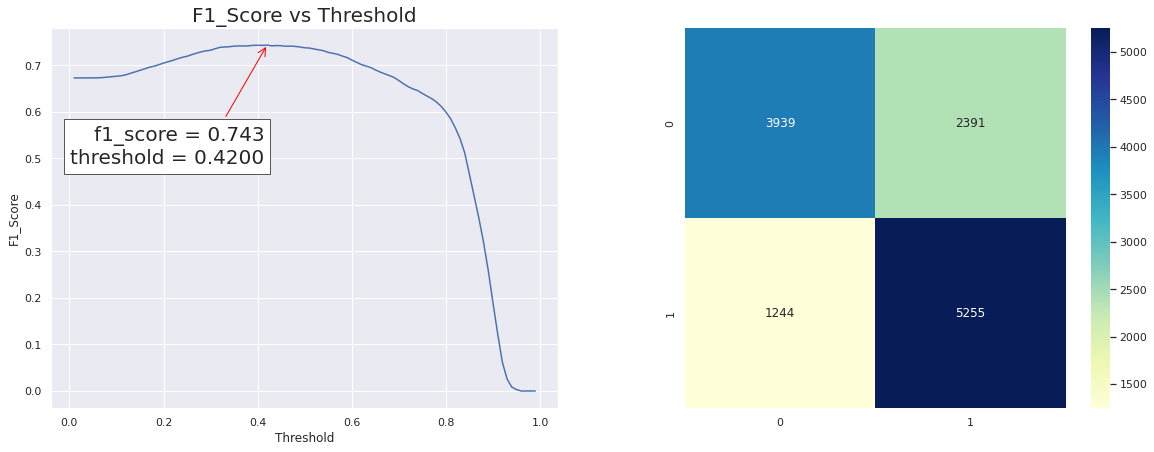

In [ ]:
thresholds = np.arange(0.01, 1.0, 0.01)
f1s = []
for thresh in thresholds:
  f1, acc = metrics(probs, targets, thresh)
  f1s.append(f1.item())

fig, ax = plt.subplots(1,2,figsize=(20,7))
ax[0].set_title("F1_Score vs Threshold", fontdict={"fontsize":20})
ax[0].set_ylabel("F1_Score")
ax[0].set_xlabel("Threshold")
ax[0].plot(thresholds, f1s)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60", color="red")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top", fontsize=20)
ax[0].annotate(f"f1_score = {np.max(f1s).round(4)}\nthreshold = {thresholds[np.argmax(f1s)]:.4f}", xy=((thresholds[np.argmax(f1s)], np.max(f1s))), **kw)

thresh = thresholds[np.argmax(f1s)]
p = probs > thresh
t = targets > thresh

tp = (p & t).sum().float()
tn = ((~p) & (~t)).sum().float()
fp = (p & (~t)).sum().float()
fn = ((~p) & t).sum().float()

sns.heatmap([[tn, fp], [fn, tp]], annot=True, fmt=".0f", cmap="YlGnBu", square=True, ax=ax[1])

## Ensemble (Neural Network with second XGBoost head)

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.005, n_estimators=500)

@torch.no_grad()
def run_xgb(model, xgb_model, df, fold):
    model.eval()

    train_ds = TrainDataset(df[df["fold"]!=fold])
    valid_ds = TrainDataset(df[df["fold"]==fold])
    train_dl = torch.utils.data.DataLoader(train_ds, batch_size=256, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)
    valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=256, shuffle=False, num_workers=4, pin_memory=True, drop_last=True)

    embeds, enlabels = [], []
    for metas, labels in tqdm(train_dl):
        metas, labels = metas.to(device), labels.to(device)

        _, embed = model(metas)
        embeds += embed.cpu().tolist()
        enlabels += labels.cpu().tolist()
    
    embeds, enlabels = np.array(embeds), np.array(enlabels)
    print("Training XGB ...")
    xgb_model.fit(embeds, enlabels)

    embeds, enlabels = [], []
    for metas, labels in tqdm(valid_dl):
        metas, labels = metas.to(device), labels.to(device)

        _, embed = model(metas)
        embeds += embed.cpu().tolist()
        enlabels += labels.cpu().tolist()
    
    embeds, enlabels = np.array(embeds), np.array(enlabels)
    xgb_acc = xgb_model.score(embeds, enlabels)
    print("XGB Fold {}, valid_acc: {:.4f}".format(fold, xgb_acc))

In [ ]:
run_xgb(model, xgb_model, cardio_df, 0)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

XGB Fold 0, valid_acc: 0.7320


## Two head Neural Network Performance

In [ ]:
valid_ds = TrainDataset(cardio_df[cardio_df["fold"]==0].reset_index(drop=True))
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=256, shuffle=False, pin_memory=True, num_workers=4)

nn_probs = []
xgb_probs = []
targets = []
with torch.no_grad():
  model.eval()
  for metas, labels in tqdm(valid_dl):
    metas, labels = metas.to(device), labels.to(device)
    logits, embeds = model(metas)

    nn_probs += torch.sigmoid(logits).view(-1).cpu().tolist()
    targets += labels.cpu().tolist()

    xgb_probs += xgb_model.predict_proba(embeds)[:,1].tolist()

nn_probs = torch.tensor(nn_probs).view(-1)
targets = torch.tensor(targets).view(-1)
xgb_probs = torch.tensor(xgb_probs).view(-1)

  0%|          | 0/51 [00:00<?, ?it/s]

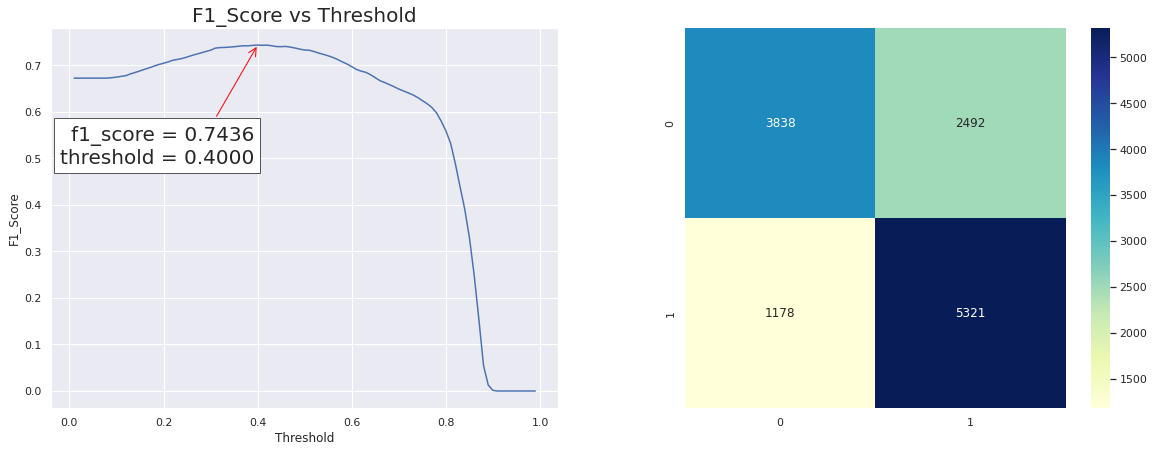

In [ ]:
probs = (nn_probs + xgb_probs) / 2.0

thresholds = np.arange(0.01, 1.0, 0.01)
f1s = []
for thresh in thresholds:
    f1, acc = metrics(probs, targets, thresh)
    f1s.append(f1.item())

fig, ax = plt.subplots(1,2,figsize=(20,7))
ax[0].set_title("F1_Score vs Threshold", fontdict={"fontsize":20})
ax[0].set_ylabel("F1_Score")
ax[0].set_xlabel("Threshold")
ax[0].plot(thresholds, f1s)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60", color="red")
kw = dict(xycoords='data',textcoords="axes fraction",
        arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top", fontsize=20)
ax[0].annotate(f"f1_score = {np.max(f1s).round(4)}\nthreshold = {thresholds[np.argmax(f1s)]:.4f}", xy=((thresholds[np.argmax(f1s)], np.max(f1s))), **kw)

thresh = thresholds[np.argmax(f1s)]
p = probs > thresh
t = targets > thresh

tp = (p & t).sum().float()
tn = ((~p) & (~t)).sum().float()
fp = (p & (~t)).sum().float()
fn = ((~p) & t).sum().float()

sns.heatmap([[tn, fp], [fn, tp]], annot=True, fmt=".0f", cmap="YlGnBu", square=True, ax=ax[1])